In [2]:
import pandas as pd                                                                                                                                                                                                   
                                                                                                                                                                                                                    
df = pd.read_csv('/Users/thinhtruong/workspace/lexical-negation/results.csv')                                                                                                                                         
                                                                                                                                                                                                                    


In [2]:
df

,Unnamed: 0.1,Unnamed: 0,neg_word,pos_word,hyphen_word,negative_affix,tokenizer,neg_bytes,neg_correct,soft_neg_correct,pos_bytes,pos_correct,soft_pos_correct,hyphen_bytes,hyphen_correct,soft_hyphen_correct,tokenizer_type,Predict,NegMorph
0,2,2,abducent,adducent,ab-ducent,ab,cl100k_base,"['ab', 'du', 'cent']",Correct,Correct,"['add', 'u', 'cent']",Incorrect,Incorrect,"['ab', '-du', 'cent']",Correct,Correct,byte_level_bpe,1,Correct
1,12,12,unable,able,un-able,un,cl100k_base,['unable'],Not segmented,Correct,['able'],Not segmented,Not segmented,"['un', '-', 'able']",Correct,Correct,byte_level_bpe,0,Under-segmented
2,22,22,unabridged,abridged,un-abridged,un,cl100k_base,"['un', 'ab', 'ridged']",Correct,Correct,"['ab', 'ridged']",Incorrect,Incorrect,"['un', '-ab', 'ridged']",Correct,Correct,byte_level_bpe,0,Correct
3,32,32,nonabsorbent,absorbent,non-absorbent,non,cl100k_base,"['non', 'abs', 'orb', 'ent']",Correct,Correct,"['abs', 'orb', 'ent']",Incorrect,Incorrect,"['non', '-abs', 'orb', 'ent']",Correct,Correct,byte_level_bpe,0,Correct
4,42,42,unabused,abused,un-abused,un,cl100k_base,"['un', 'ab', 'used']",Correct,Correct,"['ab', 'used']",Incorrect,Incorrect,"['un', '-ab', 'used']",Correct,Correct,byte_level_bpe,0,Correct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6262,20846,20846,unweave,weave,un-weave,un,meta-llama/Llama-2-13b-chat-hf,"['un', 'we', 'ave']",Correct,Correct,"['we', 'ave']",Incorrect,Incorrect,"['un', '-', 'we', 'ave']",Correct,Correct,sentencepiece,0,Correct
6263,20856,20856,unwind,wind,un-wind,un,meta-llama/Llama-2-13b-chat-hf,"['un', 'wind']",Correct,Correct,['wind'],Not segmented,Not segmented,"['un', '-', 'wind']",Correct,Correct,sentencepiece,1,Correct
6264,20866,20866,unwire,wire,un-wire,un,meta-llama/Llama-2-13b-chat-hf,"['unw', 'ire']",Incorrect,Correct,['wire'],Not segmented,Not segmented,"['un', '-', 'wire']",Correct,Correct,sentencepiece,1,Under-segmented
6265,20876,20876,unwrap,wrap,un-wrap,un,meta-llama/Llama-2-13b-chat-hf,"['un', 'wrap']",Correct,Correct,['wrap'],Not segmented,Not segmented,"['un', '-', 'wrap']",Correct,Correct,sentencepiece,1,Correct


In [3]:
model_dict = {'gpt2': 'GPT-2', 'cl100k_base': 'GPT-4', 'roberta-base': 'RoBERTa-base', 'google/flan-t5-xxl': 'Flan-T5-xxl',
                'google/electra-base-discriminator': 'ELECTRA-base', 'albert-base-v2': 'ALBERT', 'bert-base-uncased': 'BERT-base',
              'meta-llama/Llama-2-13b-chat-hf':'LLama-2-13B','xlnet-base-cased': 'XLNet-base'
             }

In [4]:
df['tokenizer'] = df['tokenizer'].map(lambda x: model_dict[x])

In [5]:
df

,Unnamed: 0.1,Unnamed: 0,neg_word,pos_word,hyphen_word,negative_affix,tokenizer,neg_bytes,neg_correct,soft_neg_correct,pos_bytes,pos_correct,soft_pos_correct,hyphen_bytes,hyphen_correct,soft_hyphen_correct,tokenizer_type,Predict,NegMorph
0,2,2,abducent,adducent,ab-ducent,ab,GPT-4,"['ab', 'du', 'cent']",Correct,Correct,"['add', 'u', 'cent']",Incorrect,Incorrect,"['ab', '-du', 'cent']",Correct,Correct,byte_level_bpe,1,Correct
1,12,12,unable,able,un-able,un,GPT-4,['unable'],Not segmented,Correct,['able'],Not segmented,Not segmented,"['un', '-', 'able']",Correct,Correct,byte_level_bpe,0,Under-segmented
2,22,22,unabridged,abridged,un-abridged,un,GPT-4,"['un', 'ab', 'ridged']",Correct,Correct,"['ab', 'ridged']",Incorrect,Incorrect,"['un', '-ab', 'ridged']",Correct,Correct,byte_level_bpe,0,Correct
3,32,32,nonabsorbent,absorbent,non-absorbent,non,GPT-4,"['non', 'abs', 'orb', 'ent']",Correct,Correct,"['abs', 'orb', 'ent']",Incorrect,Incorrect,"['non', '-abs', 'orb', 'ent']",Correct,Correct,byte_level_bpe,0,Correct
4,42,42,unabused,abused,un-abused,un,GPT-4,"['un', 'ab', 'used']",Correct,Correct,"['ab', 'used']",Incorrect,Incorrect,"['un', '-ab', 'used']",Correct,Correct,byte_level_bpe,0,Correct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6262,20846,20846,unweave,weave,un-weave,un,LLama-2-13B,"['un', 'we', 'ave']",Correct,Correct,"['we', 'ave']",Incorrect,Incorrect,"['un', '-', 'we', 'ave']",Correct,Correct,sentencepiece,0,Correct
6263,20856,20856,unwind,wind,un-wind,un,LLama-2-13B,"['un', 'wind']",Correct,Correct,['wind'],Not segmented,Not segmented,"['un', '-', 'wind']",Correct,Correct,sentencepiece,1,Correct
6264,20866,20866,unwire,wire,un-wire,un,LLama-2-13B,"['unw', 'ire']",Incorrect,Correct,['wire'],Not segmented,Not segmented,"['un', '-', 'wire']",Correct,Correct,sentencepiece,1,Under-segmented
6265,20876,20876,unwrap,wrap,un-wrap,un,LLama-2-13B,"['un', 'wrap']",Correct,Correct,['wrap'],Not segmented,Not segmented,"['un', '-', 'wrap']",Correct,Correct,sentencepiece,1,Correct


In [317]:
df.to_csv('df_negmorph.csv', index = False)

In [310]:
df_flan_over = df.loc[ (df['tokenizer'] == 'Flan-T5-xxl') & (df['NegMorph'] == 'Over-segmented') ]

In [311]:
df_flan_over

,Unnamed: 0.1,Unnamed: 0,neg_word,pos_word,hyphen_word,negative_affix,tokenizer,neg_bytes,neg_correct,soft_neg_correct,pos_bytes,pos_correct,soft_pos_correct,hyphen_bytes,hyphen_correct,soft_hyphen_correct,tokenizer_type,Predict,NegMorph
2205,1165,1165,bibless,bibbed,bib-less,less,Flan-T5-xxl,"['bible', 's', 's']",Incorrect,Incorrect,"['bib', 'bed']",Incorrect,Incorrect,"['bib', '-', 'less']",Correct,Correct,sentencepiece,1,Over-segmented
2589,5005,5005,handless,handed,hand-less,less,Flan-T5-xxl,"['handles', 's']",Incorrect,Incorrect,['handed'],Not segmented,Not segmented,"['hand', '-', 'less']",Correct,Correct,sentencepiece,0,Over-segmented
2941,8525,8525,irrational,rational,ir-rational,ir,Flan-T5-xxl,"['i', 'r', 'ration', 'al']",Incorrect,Incorrect,['rational'],Not segmented,Not segmented,"['i', 'r', '-', 'ration', 'al']",Incorrect,Incorrect,sentencepiece,0,Over-segmented
3253,11645,11645,Nonconformist,Anglican,Nonconformist,non,Flan-T5-xxl,"['Non', 'con', 'form', 'ist']",Incorrect,Incorrect,"['An', 'gli', 'can']",Incorrect,Incorrect,"['Non', 'con', 'form', 'ist']",Incorrect,Incorrect,sentencepiece,0,Over-segmented
3274,11855,11855,anovulation,ovulation,an-ovulation,an,Flan-T5-xxl,"['a', 'nov', 'ulation']",Incorrect,Incorrect,"['o', 'v', 'ulation']",Incorrect,Incorrect,"['an', '-', 'o', 'v', 'ulation']",Correct,Correct,sentencepiece,0,Over-segmented
3558,14695,14695,antinode,node,anti-node,anti,Flan-T5-xxl,"['a', 'ntino', 'de']",Incorrect,Incorrect,"['no', 'de']",Incorrect,Incorrect,"['anti', '-', 'n', 'o', 'de']",Correct,Correct,sentencepiece,1,Over-segmented
3912,18235,18235,irrationally,rationally,ir-rationally,ir,Flan-T5-xxl,"['i', 'r', 'ration', 'ally']",Incorrect,Incorrect,"['rational', 'ly']",Incorrect,Incorrect,"['i', 'r', '-', 'ration', 'ally']",Incorrect,Incorrect,sentencepiece,0,Over-segmented
3974,18855,18855,dissent,assent,dis-sent,dis,Flan-T5-xxl,"['d', 'issent']",Incorrect,Incorrect,"['as', 'sent']",Incorrect,Incorrect,"['dis', '-', 'sent']",Correct,Correct,sentencepiece,0,Over-segmented


# Error analysis
plot percentage correct/incorrect prediction for each affix for each token 


In [71]:
df_model = df.groupby(['tokenizer', 'negative_affix'])['Predict'].mean().reset_index()

In [72]:
df_model

,tokenizer,negative_affix,Predict
0,Flan-T5-xxl,a,0.228571
1,Flan-T5-xxl,ab,0.500000
2,Flan-T5-xxl,an,0.166667
3,Flan-T5-xxl,anti,0.333333
4,Flan-T5-xxl,contra,0.666667
...,...,...,...
115,LLama-2-13B,super,1.000000
116,LLama-2-13B,syn,1.000000
117,LLama-2-13B,tra,1.000000
118,LLama-2-13B,un,0.131166


In [73]:
file_path ='/Users/thinhtruong/workspace/lexical-negation/affix_incorrect_tokenized_into.csv'                                                                                                                         
                                                                                                                                                                                                                    
# Load the dataset                                                                                                                                                                                                    
data = pd.read_csv(file_path)                                                                                                                                                                                         
                                                                                                                                                                                                                   

In [74]:
data[data['tokenizer'] == 'LLama-2-13B']

,Unnamed: 0,neg_word,pos_word,hyphen_word,negative_affix,tokenizer,neg_bytes,neg_correct,soft_neg_correct,pos_bytes,pos_correct,soft_pos_correct,hyphen_bytes,hyphen_correct,soft_hyphen_correct,tokenizer_type,NegMorph,tokenized_into
6,16,unable,able,un-able,un,LLama-2-13B,['unable'],Not segmented,Correct,['able'],False,Not segmented,"['un', '-', 'able']",Correct,Correct,sentencepiece,Under-segmented,unable
19,56,acatalectic,hypercatalectic,a-catalectic,a,LLama-2-13B,"['ac', 'ata', 'lect', 'ic']",Incorrect,Correct,"['hyper', 'c', 'ata', 'lect', 'ic']",True,Correct,"['a', '-', 'c', 'ata', 'lect', 'ic']",Correct,Correct,sentencepiece,Under-segmented,ac
40,106,discordant,accordant,dis-cordant,dis,LLama-2-13B,"['disc', 'ord', 'ant']",Incorrect,Correct,"['accord', 'ant']",False,Incorrect,"['dis', '-', 'cord', 'ant']",Correct,Correct,sentencepiece,Under-segmented,disc
107,356,unaffected,affected,un-affected,un,LLama-2-13B,"['una', 'ffect', 'ed']",Incorrect,Correct,['affected'],False,Not segmented,"['un', '-', 'aff', 'ected']",Correct,Correct,sentencepiece,Under-segmented,una
111,366,unaffixed,affixed,un-affixed,un,LLama-2-13B,"['una', 'ff', 'ixed']",Incorrect,Correct,"['aff', 'ixed']",False,Incorrect,"['un', '-', 'aff', 'ixed']",Correct,Correct,sentencepiece,Under-segmented,una
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6687,20766,unfurl,roll_up,un-furl,un,LLama-2-13B,"['unf', 'url']",Incorrect,Correct,"['roll', '_', 'up']",False,Incorrect,"['un', '-', 'f', 'url']",Correct,Correct,sentencepiece,Under-segmented,unf
6698,20796,unscrew,screw,un-screw,un,LLama-2-13B,"['uns', 'cre', 'w']",Incorrect,Correct,"['sc', 'rew']",False,Incorrect,"['un', '-', 's', 'cre', 'w']",Correct,Correct,sentencepiece,Under-segmented,uns
6705,20816,invalidate,validate,in-validate,in,LLama-2-13B,"['invalid', 'ate']",Incorrect,Correct,['validate'],False,Not segmented,"['in', '-', 'validate']",Correct,Correct,sentencepiece,Under-segmented,invalid
6715,20836,devitalize,vitalize,de-vitalize,de,LLama-2-13B,"['dev', 'ital', 'ize']",Incorrect,Correct,"['vital', 'ize']",False,Incorrect,"['de', '-', 'v', 'ital', 'ize']",Correct,Correct,sentencepiece,Under-segmented,dev


In [75]:
rows = []
for i, row in df.iterrows():
    tokenizer = row['tokenizer']
    word = row['neg_word']
    negative_affix = row['negative_affix']
    # print(word, tokenizer)
    row_tmp = data.loc[ (data['tokenizer'] == tokenizer) & (data['neg_word'] == word)]
    tokenized_into = row_tmp['tokenized_into'].array
    if len(tokenized_into):
        tokenized_into = tokenized_into[0]
    else:
        tokenized_into = negative_affix
    # print(tokenized_into)
    row['tokenized_into'] = tokenized_into
    
    rows.append(row)
df_merged = pd.DataFrame(data = rows)

In [76]:
df_merged

,Unnamed: 0.1,Unnamed: 0,neg_word,pos_word,hyphen_word,negative_affix,tokenizer,neg_bytes,neg_correct,soft_neg_correct,pos_bytes,pos_correct,soft_pos_correct,hyphen_bytes,hyphen_correct,soft_hyphen_correct,tokenizer_type,Predict,NegMorph,tokenized_into
0,2,2,abducent,adducent,ab-ducent,ab,GPT-4,"['ab', 'du', 'cent']",Correct,Correct,"['add', 'u', 'cent']",Incorrect,Incorrect,"['ab', '-du', 'cent']",Correct,Correct,byte_level_bpe,1,Correct,ab
1,12,12,unable,able,un-able,un,GPT-4,['unable'],Not segmented,Correct,['able'],Not segmented,Not segmented,"['un', '-', 'able']",Correct,Correct,byte_level_bpe,0,Under-segmented,unable
2,22,22,unabridged,abridged,un-abridged,un,GPT-4,"['un', 'ab', 'ridged']",Correct,Correct,"['ab', 'ridged']",Incorrect,Incorrect,"['un', '-ab', 'ridged']",Correct,Correct,byte_level_bpe,0,Correct,un
3,32,32,nonabsorbent,absorbent,non-absorbent,non,GPT-4,"['non', 'abs', 'orb', 'ent']",Correct,Correct,"['abs', 'orb', 'ent']",Incorrect,Incorrect,"['non', '-abs', 'orb', 'ent']",Correct,Correct,byte_level_bpe,0,Correct,non
4,42,42,unabused,abused,un-abused,un,GPT-4,"['un', 'ab', 'used']",Correct,Correct,"['ab', 'used']",Incorrect,Incorrect,"['un', '-ab', 'used']",Correct,Correct,byte_level_bpe,0,Correct,un
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6262,20846,20846,unweave,weave,un-weave,un,LLama-2-13B,"['un', 'we', 'ave']",Correct,Correct,"['we', 'ave']",Incorrect,Incorrect,"['un', '-', 'we', 'ave']",Correct,Correct,sentencepiece,0,Correct,un
6263,20856,20856,unwind,wind,un-wind,un,LLama-2-13B,"['un', 'wind']",Correct,Correct,['wind'],Not segmented,Not segmented,"['un', '-', 'wind']",Correct,Correct,sentencepiece,1,Correct,un
6264,20866,20866,unwire,wire,un-wire,un,LLama-2-13B,"['unw', 'ire']",Incorrect,Correct,['wire'],Not segmented,Not segmented,"['un', '-', 'wire']",Correct,Correct,sentencepiece,1,Under-segmented,unw
6265,20876,20876,unwrap,wrap,un-wrap,un,LLama-2-13B,"['un', 'wrap']",Correct,Correct,['wrap'],Not segmented,Not segmented,"['un', '-', 'wrap']",Correct,Correct,sentencepiece,1,Correct,un


In [77]:
import numpy as np

In [78]:
df_merged['Counts'] = np.zeros(len(df_merged))


In [79]:
df_merged_by_model = df_merged.groupby(['tokenizer', 'negative_affix', 'tokenized_into', 'Predict'])["Predict"].count().reset_index(name = "count")                                                                       

In [80]:
df_merged_by_model

,tokenizer,negative_affix,tokenized_into,Predict,count
0,Flan-T5-xxl,a,a,0,22
1,Flan-T5-xxl,a,a,1,3
2,Flan-T5-xxl,a,ab,1,1
3,Flan-T5-xxl,a,adia,1,1
4,Flan-T5-xxl,a,as,0,1
...,...,...,...,...,...
746,LLama-2-13B,un,unw,1,1
747,LLama-2-13B,under,und,0,1
748,LLama-2-13B,under,under,0,13
749,LLama-2-13B,under,under,1,1


In [81]:
df_merged_by_model_total = df_merged_by_model.groupby(['tokenizer', 'negative_affix'])['count'].sum().reset_index(name = "total")

In [82]:
rows = []
for i, row in df_merged_by_model.iterrows():
    row['total'] = df_merged_by_model_total[df_merged_by_model_total['negative_affix'] == row['negative_affix']]['total'].iloc[0]
    row['NegMorph'] = df_merged.loc[(df_merged['negative_affix'] == row['negative_affix']) & (df_merged['tokenized_into'] == row['tokenized_into'])]['NegMorph'].iloc[0] 
    rows.append(row)
df_merged_by_model_total = pd.DataFrame(data = rows)

In [83]:
df_merged_by_model_total

,tokenizer,negative_affix,tokenized_into,Predict,count,total,NegMorph
0,Flan-T5-xxl,a,a,0,22,35,Correct
1,Flan-T5-xxl,a,a,1,3,35,Correct
2,Flan-T5-xxl,a,ab,1,1,35,Under-segmented
3,Flan-T5-xxl,a,adia,1,1,35,Under-segmented
4,Flan-T5-xxl,a,as,0,1,35,Under-segmented
...,...,...,...,...,...,...,...
746,LLama-2-13B,un,unw,1,1,892,Under-segmented
747,LLama-2-13B,under,und,0,1,17,Over-segmented
748,LLama-2-13B,under,under,0,13,17,Correct
749,LLama-2-13B,under,under,1,1,17,Correct


In [84]:
df_merged_by_model_total_negmorph = df_merged_by_model_total.groupby(['tokenizer', 'negative_affix','NegMorph','Predict'])['count'].sum().reset_index(name = "NegMorph_count")

In [85]:
df_merged_by_model_total_negmorph_percentage = df_merged_by_model_total_negmorph.groupby(['tokenizer','negative_affix','NegMorph'])['NegMorph_count'].sum().reset_index(name = 'total')

In [86]:
df_merged_by_model_total_negmorph_percentage

,tokenizer,negative_affix,NegMorph,total
0,Flan-T5-xxl,a,Correct,25
1,Flan-T5-xxl,a,Under-segmented,10
2,Flan-T5-xxl,ab,Correct,3
3,Flan-T5-xxl,ab,Under-segmented,3
4,Flan-T5-xxl,an,Correct,4
...,...,...,...,...
193,LLama-2-13B,un,Correct,721
194,LLama-2-13B,un,Under-segmented,171
195,LLama-2-13B,under,Correct,14
196,LLama-2-13B,under,Over-segmented,1


#draw here
percentage instead of count
1 | 0
for each 1: negmorph (percentage) negmorph_count/ total for that negative affix
max 6 values (3 negmorph x 2 predict) for each


In [87]:
df_merged_by_model_total_negmorph.to_csv('affix_performance_by_negmorph.csv', index = False)

In [3]:
df_merged_by_model_total_negmorph = pd.read_csv('affix_performance_by_negmorph.csv')

In [88]:
df_merged_by_model_total_negmorph

,tokenizer,negative_affix,NegMorph,Predict,NegMorph_count
0,Flan-T5-xxl,a,Correct,0,22
1,Flan-T5-xxl,a,Correct,1,3
2,Flan-T5-xxl,a,Under-segmented,0,5
3,Flan-T5-xxl,a,Under-segmented,1,5
4,Flan-T5-xxl,ab,Correct,0,2
...,...,...,...,...,...
282,LLama-2-13B,un,Under-segmented,1,18
283,LLama-2-13B,under,Correct,0,13
284,LLama-2-13B,under,Correct,1,1
285,LLama-2-13B,under,Over-segmented,0,1


In [89]:
df_merged_by_model_total_affix = df_merged_by_model_total_negmorph.groupby(['tokenizer', 'negative_affix'])['NegMorph_count'].sum().reset_index(name = 'affix_count')

In [90]:
df_merged_by_model_total_affix

,tokenizer,negative_affix,affix_count
0,Flan-T5-xxl,a,35
1,Flan-T5-xxl,ab,6
2,Flan-T5-xxl,an,6
3,Flan-T5-xxl,anti,9
4,Flan-T5-xxl,contra,3
...,...,...,...
115,LLama-2-13B,super,3
116,LLama-2-13B,syn,3
117,LLama-2-13B,tra,1
118,LLama-2-13B,un,892


In [91]:
rows = []
for i, row in df_merged_by_model_total_negmorph.iterrows():
    affix = row['negative_affix']
    tokenizer = row['tokenizer']
    total = df_merged_by_model_total_affix.loc[(df_merged_by_model_total_affix['tokenizer'] == tokenizer) & (df_merged_by_model_total_affix['negative_affix'] == affix)]['affix_count'].iloc[0]
    # print(total)
    row['percentage'] = int(row['NegMorph_count']) / int(total)
    # print(row['percentage'])
    row['total'] = total

    rows.append(row)
    # print(row)
    # print('================')
# print(rows)
df_merged_percentage = pd.DataFrame(data = rows)

In [92]:
df_merged_percentage

,tokenizer,negative_affix,NegMorph,Predict,NegMorph_count,percentage,total
0,Flan-T5-xxl,a,Correct,0,22,0.628571,35
1,Flan-T5-xxl,a,Correct,1,3,0.085714,35
2,Flan-T5-xxl,a,Under-segmented,0,5,0.142857,35
3,Flan-T5-xxl,a,Under-segmented,1,5,0.142857,35
4,Flan-T5-xxl,ab,Correct,0,2,0.333333,6
...,...,...,...,...,...,...,...
282,LLama-2-13B,un,Under-segmented,1,18,0.020179,892
283,LLama-2-13B,under,Correct,0,13,0.764706,17
284,LLama-2-13B,under,Correct,1,1,0.058824,17
285,LLama-2-13B,under,Over-segmented,0,1,0.058824,17


In [93]:
df_merged_percentage.to_csv('affix_negmorph_percentage.csv', index = False)

In [3]:
df_merged_percentage = pd.read_csv('affix_negmorph_percentage.csv')

In [4]:
df_merged_percentage

,tokenizer,negative_affix,NegMorph,Predict,NegMorph_count,percentage,total
0,Flan-T5-xxl,a,Correct,0,22,0.628571,35
1,Flan-T5-xxl,a,Correct,1,3,0.085714,35
2,Flan-T5-xxl,a,Under-segmented,0,5,0.142857,35
3,Flan-T5-xxl,a,Under-segmented,1,5,0.142857,35
4,Flan-T5-xxl,ab,Correct,0,2,0.333333,6
...,...,...,...,...,...,...,...
282,LLama-2-13B,un,Under-segmented,1,18,0.020179,892
283,LLama-2-13B,under,Correct,0,13,0.764706,17
284,LLama-2-13B,under,Correct,1,1,0.058824,17
285,LLama-2-13B,under,Over-segmented,0,1,0.058824,17


In [5]:
df_merged_percentage.groupby(['tokenizer','negative_affix'])['percentage'].sum()

tokenizer    negative_affix
Flan-T5-xxl  a                 1.0
             ab                1.0
             an                1.0
             anti              1.0
             contra            1.0
                              ... 
LLama-2-13B  super             1.0
             syn               1.0
             tra               1.0
             un                1.0
             under             1.0
Name: percentage, Length: 120, dtype: float64

In [6]:
top_affixes_df = df_merged_percentage.sort_values('total', ascending=False).drop_duplicates('negative_affix').head(40)                                                                                                                  
                                                                                                                                                                                                                    
# Now we need to filter the original DataFrame to only include rows that correspond to the top 10 affixes                                                                                                             
top_affixes_list = top_affixes_df['negative_affix'].tolist()                                                                                                                                                          
filtered_df = df_merged_percentage[df_merged_percentage['negative_affix'].isin(top_affixes_list)]                                                                                                                                                         
                                                                                                                                                                                                                    
# Display the filtered DataFrame to verify the selection                                                                                                                                                              
filtered_df

,tokenizer,negative_affix,NegMorph,Predict,NegMorph_count,percentage,total
0,Flan-T5-xxl,a,Correct,0,22,0.628571,35
1,Flan-T5-xxl,a,Correct,1,3,0.085714,35
2,Flan-T5-xxl,a,Under-segmented,0,5,0.142857,35
3,Flan-T5-xxl,a,Under-segmented,1,5,0.142857,35
4,Flan-T5-xxl,ab,Correct,0,2,0.333333,6
...,...,...,...,...,...,...,...
282,LLama-2-13B,un,Under-segmented,1,18,0.020179,892
283,LLama-2-13B,under,Correct,0,13,0.764706,17
284,LLama-2-13B,under,Correct,1,1,0.058824,17
285,LLama-2-13B,under,Over-segmented,0,1,0.058824,17


In [7]:
top_affixes_pivot = filtered_df.pivot_table(index='negative_affix', columns=['tokenizer','Predict','NegMorph'], values='percentage', fill_value=0)

In [8]:
top_affixes_pivot

tokenizer      Flan-T5-xxl                                            
Predict                  0                                        1   
NegMorph           Correct Over-segmented Under-segmented   Correct   
negative_affix                                                        
a                 0.628571       0.000000        0.142857  0.085714  \
ab                0.333333       0.000000        0.166667  0.166667   
an                0.666667       0.166667        0.000000  0.000000   
anti              0.666667       0.000000        0.000000  0.222222   
contra            0.333333       0.000000        0.000000  0.666667   
counter           1.000000       0.000000        0.000000  0.000000   
de                0.536364       0.000000        0.100000  0.227273   
di                0.000000       0.000000        0.000000  0.000000   
dis               0.542254       0.007042        0.176056  0.098592   
down              0.200000       0.000000        0.200000  0.200000   
dys               0.857143       0.000000        0.000000  0.142857   
e                 0.000000       0.000000        0.000000  1.000000   
ef                0.000000       0.000000        0.000000  0.000000   
ex                0.000000       0.000000        0.500000  0.500000   
extra             0.000000       0.000000        0.000000  0.333333   
free              1.000000       0.000000        0.000000  0.000000   
hyper             0.000000       0.000000        0.000000  1.000000   
hypo              0.300000       0.000000        0.000000  0.700000   
il                0.722222       0.000000        0.111111  0.000000   
ill               1.000000       0.000000        0.000000  0.000000   
im                0.390000       0.000000        0.330000  0.110000   
in                0.693009       0.000000        0.109422  0.079027   
ir                0.000000       0.074074        0.851852  0.000000   
less              0.669231       0.007692        0.238462  0.007692   
mal               0.266667       0.000000        0.066667  0.333333   
mis               0.500000       0.000000        0.125000  0.250000   
no                1.000000       0.000000        0.000000  0.000000   
non               0.981481       0.000000        0.018519  0.000000   
off               0.833333       0.000000        0.000000  0.000000   
on                0.000000       0.000000        0.000000  1.000000   
out               0.090909       0.000000        0.000000  0.818182   
over              0.000000       0.000000        0.000000  0.000000   
para              0.000000       0.000000        0.000000  1.000000   
re                0.000000       0.000000        0.000000  0.000000   
sub               0.333333       0.000000        0.000000  0.666667   
super             0.000000       0.000000        0.000000  0.666667   
syn               0.000000       0.000000        0.000000  1.000000   
tra               0.000000       0.000000        0.000000  0.000000   
un                0.766816       0.000000        0.198430  0.010090   
under             0.823529       0.000000        0.058824  0.117647   

tokenizer                                         GPT-4                  
Predict                                               0                  
NegMorph       Over-segmented Under-segmented   Correct Over-segmented   
negative_affix                                                           
a                    0.000000        0.142857  0.000000       0.000000  \
ab                   0.000000        0.333333  0.333333       0.000000   
an                   0.000000        0.166667  0.666667       0.000000   
anti                 0.111111        0.000000  0.000000       0.222222   
contra               0.000000        0.000000  0.000000       1.000000   
counter              0.000000        0.000000  0.666667       0.333333   
de                   0.000000        0.136364  0.254545       0.036364   
di                   0.000000        1.000000  0.000000      

In [9]:
top_affixes_pivot.loc['mean'] = top_affixes_pivot.mean()

In [10]:
top_affixes_pivot

tokenizer      Flan-T5-xxl                                            
Predict                  0                                        1   
NegMorph           Correct Over-segmented Under-segmented   Correct   
negative_affix                                                        
a                 0.628571       0.000000        0.142857  0.085714  \
ab                0.333333       0.000000        0.166667  0.166667   
an                0.666667       0.166667        0.000000  0.000000   
anti              0.666667       0.000000        0.000000  0.222222   
contra            0.333333       0.000000        0.000000  0.666667   
counter           1.000000       0.000000        0.000000  0.000000   
de                0.536364       0.000000        0.100000  0.227273   
di                0.000000       0.000000        0.000000  0.000000   
dis               0.542254       0.007042        0.176056  0.098592   
down              0.200000       0.000000        0.200000  0.200000   
dys               0.857143       0.000000        0.000000  0.142857   
e                 0.000000       0.000000        0.000000  1.000000   
ef                0.000000       0.000000        0.000000  0.000000   
ex                0.000000       0.000000        0.500000  0.500000   
extra             0.000000       0.000000        0.000000  0.333333   
free              1.000000       0.000000        0.000000  0.000000   
hyper             0.000000       0.000000        0.000000  1.000000   
hypo              0.300000       0.000000        0.000000  0.700000   
il                0.722222       0.000000        0.111111  0.000000   
ill               1.000000       0.000000        0.000000  0.000000   
im                0.390000       0.000000        0.330000  0.110000   
in                0.693009       0.000000        0.109422  0.079027   
ir                0.000000       0.074074        0.851852  0.000000   
less              0.669231       0.007692        0.238462  0.007692   
mal               0.266667       0.000000        0.066667  0.333333   
mis               0.500000       0.000000        0.125000  0.250000   
no                1.000000       0.000000        0.000000  0.000000   
non               0.981481       0.000000        0.018519  0.000000   
off               0.833333       0.000000        0.000000  0.000000   
on                0.000000       0.000000        0.000000  1.000000   
out               0.090909       0.000000        0.000000  0.818182   
over              0.000000       0.000000        0.000000  0.000000   
para              0.000000       0.000000        0.000000  1.000000   
re                0.000000       0.000000        0.000000  0.000000   
sub               0.333333       0.000000        0.000000  0.666667   
super             0.000000       0.000000        0.000000  0.666667   
syn               0.000000       0.000000        0.000000  1.000000   
tra               0.000000       0.000000        0.000000  0.000000   
un                0.766816       0.000000        0.198430  0.010090   
under             0.823529       0.000000        0.058824  0.117647   
mean              0.403372       0.006387        0.084847  0.285066   

tokenizer                                         GPT-4                  
Predict                                               0                  
NegMorph       Over-segmented Under-segmented   Correct Over-segmented   
negative_affix                                                           
a                    0.000000        0.142857  0.000000       0.000000  \
ab                   0.000000        0.333333  0.333333       0.000000   
an                   0.000000        0.166667  0.666667       0.000000   
anti                 0.111111        0.000000  0.000000       0.222222   
contra               0.000000        0.000000  0.000000       1.000000   
counter              0.000000        0.000000  0.666667       0.333333   
de                   0.000000        0.136364  0.254545       0.

In [11]:
gpt4_dict = {'model': 'GPT-4'}
flan_dict = {'model': 'Flan-T5-xxl'}
llama_dict = {'model': 'Llama-2-13B'}


In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


0.31560463317602183
0.40337157535462687
0.3120845981932815


/var/folders/gx/7443dw8j2bg8ggtdfm60ln_r0000gn/T/ipykernel_11595/2202979457.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['1','','0.5','','0','','0.5','','1'], fontsize = 20)


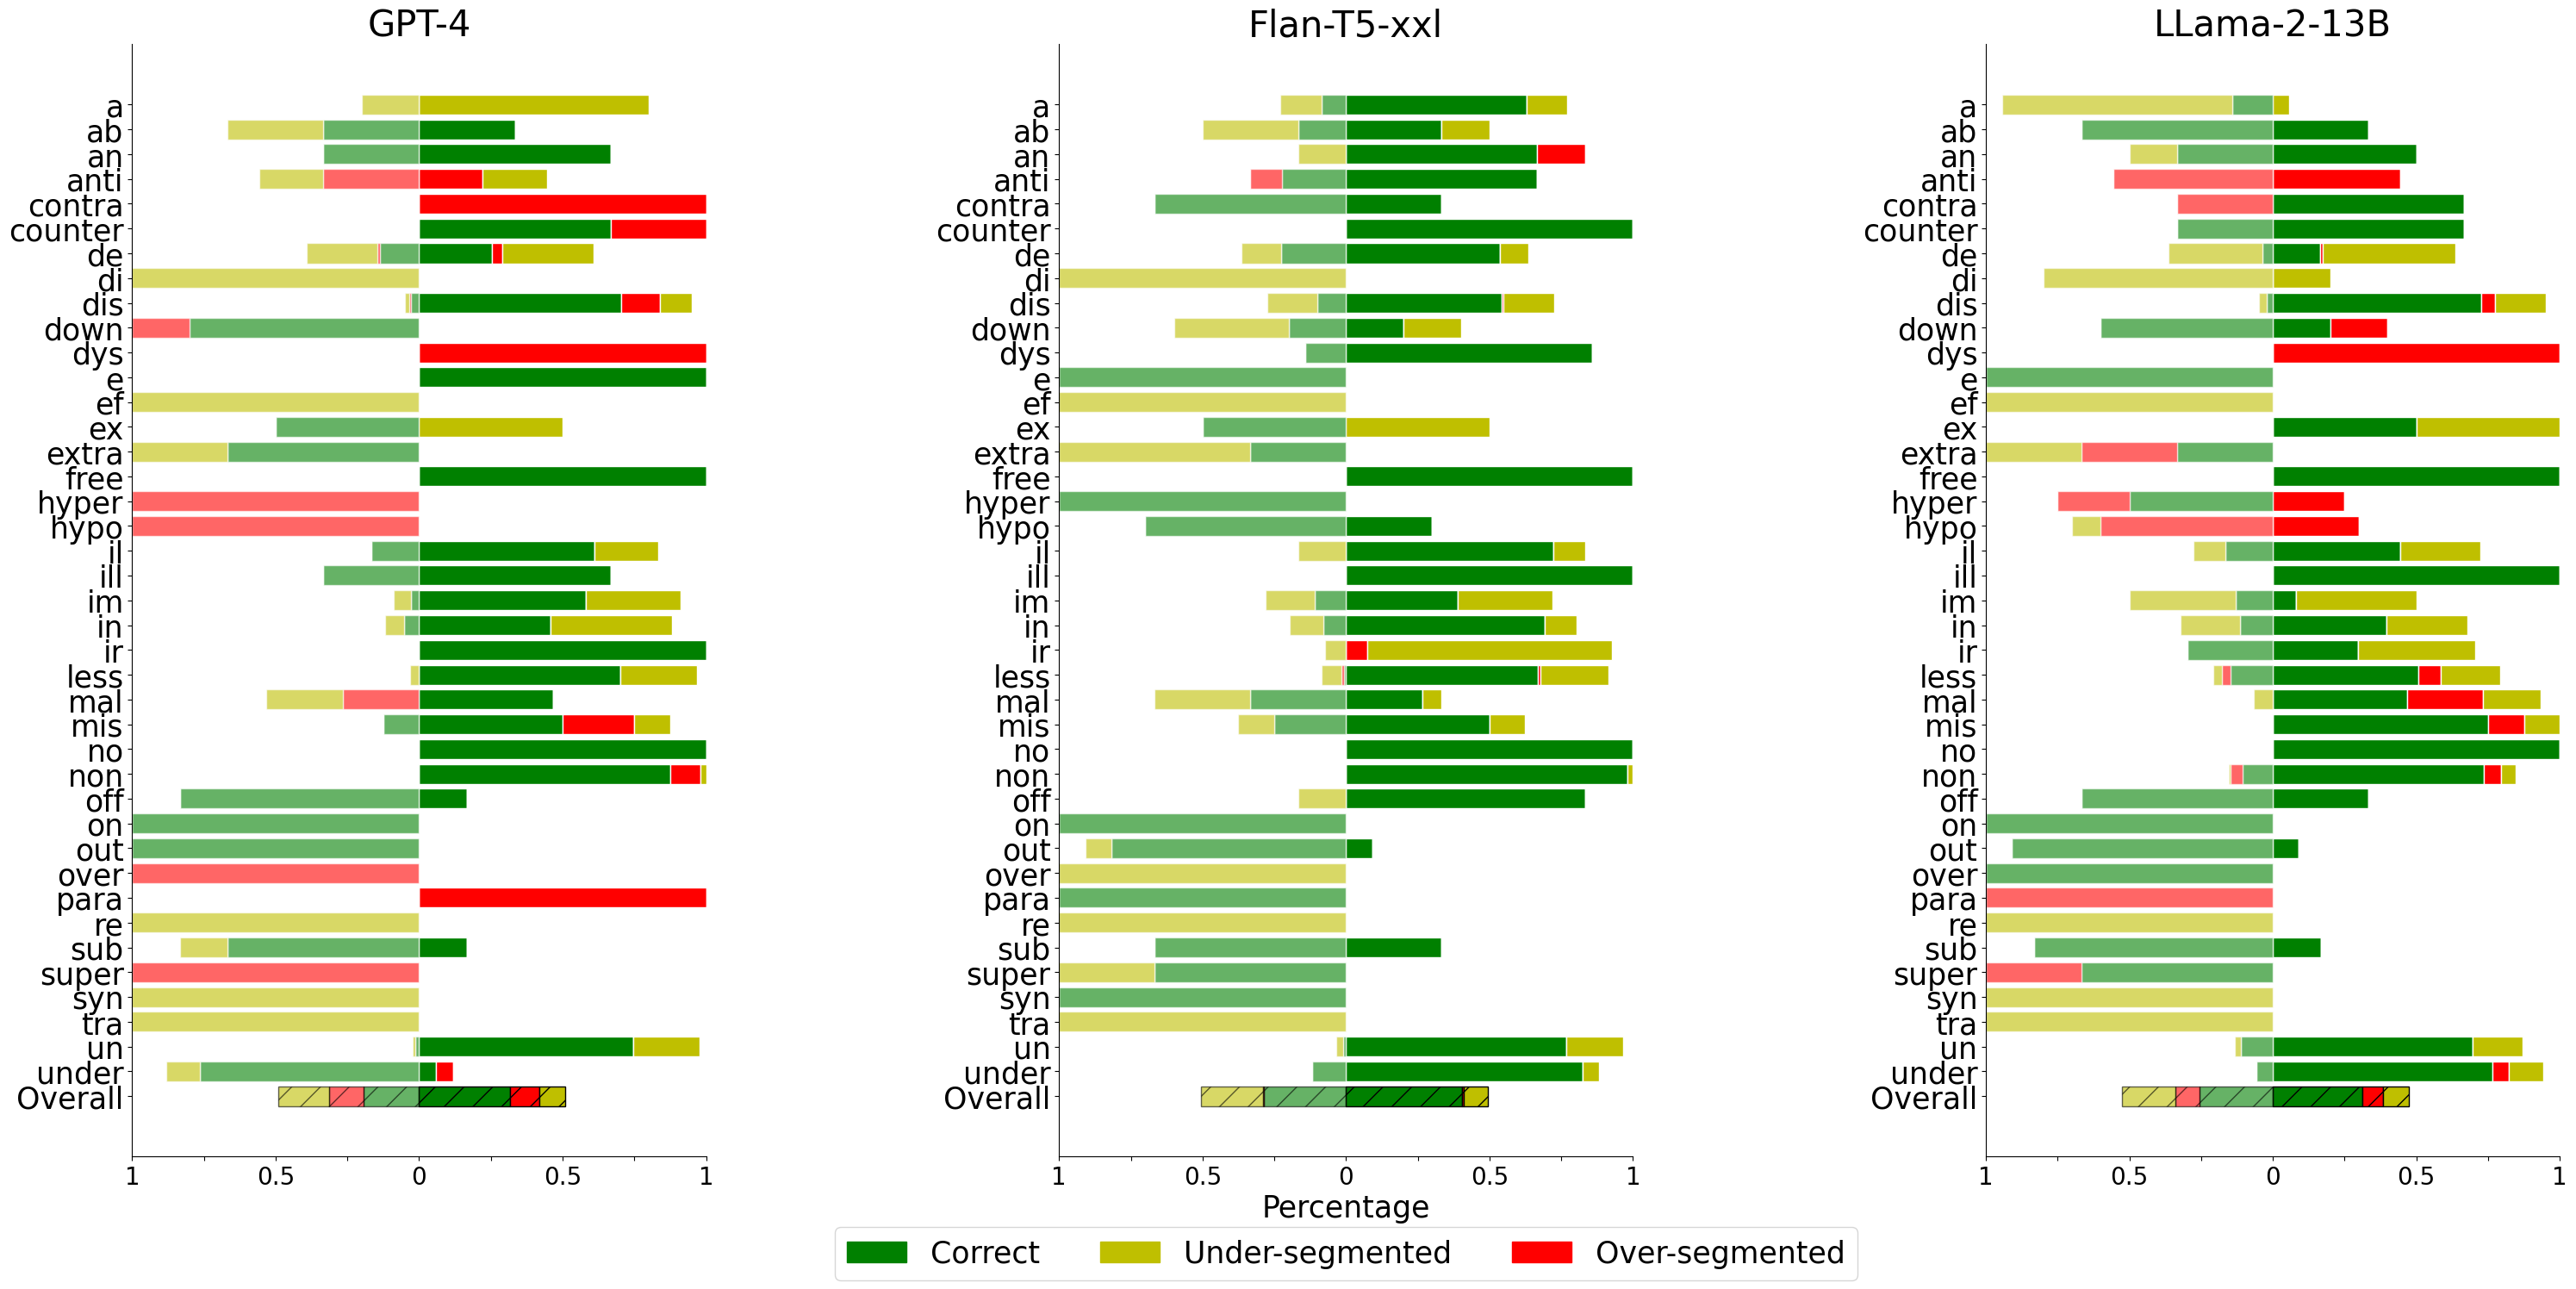

In [24]:
tokenizers = filtered_df['tokenizer'].unique()  
# print(tokenizers)
tokenizers = ['GPT-4','Flan-T5-xxl','LLama-2-13B']                                                                                                                                                                                                                        
# Create a figure with subplots for each tokenizer                                                                                                                                                                    
fig, axes = plt.subplots(nrows=1, ncols=len(tokenizers), figsize=(10 * len(tokenizers), 15), sharex= True)                                                                                                              
                                                                                                                                                                                                                    
# Plot a stacked bar plot for each tokenizer                                                                                                                                                                          
for ax, tokenizer in zip(axes, tokenizers):                                                                                                                                                                           
  # Filter the DataFrame for the current tokenizer                                                                                                                                                                  
    tokenizer_df = filtered_df[filtered_df['tokenizer'] == tokenizer]                                                                                                                         
    # Pivot the data for the current tokenizer                                                                                                                                                                        
    pivot_df = tokenizer_df.pivot_table(index='negative_affix',                                                                                                                                                       
                                      columns=['Predict', 'NegMorph'],                                                                                                                                              
                                      values='percentage',                                                                                                                                                          
                                      fill_value=0)
    pivot_df.loc['Overall'] = pivot_df.mean()
    pivot_df = pivot_df[::-1]
    if tokenizer == 'GPT-4':
        gpt4_dict['NegMorph_Correct'] = pivot_df.loc['Overall'][0][0]
        gpt4_dict['NegMorph_Over-segmented'] = pivot_df.loc['Overall'][0][1]
        gpt4_dict['NegMorph_Under-segmented'] = pivot_df.loc['Overall'][0][2]
    elif tokenizer == 'Flan-T5-xxl':
        flan_dict['NegMorph_Correct'] = pivot_df.loc['Overall'][0][0]
        flan_dict['NegMorph_Over-segmented'] = pivot_df.loc['Overall'][0][1]
        flan_dict['NegMorph_Under-segmented'] = pivot_df.loc['Overall'][0][2]
    elif tokenizer == 'LLama-2-13B':
        llama_dict['NegMorph_Correct'] = pivot_df.loc['Overall'][0][0]
        llama_dict['NegMorph_Over-segmented'] = pivot_df.loc['Overall'][0][1]
        llama_dict['NegMorph_Under-segmented'] = pivot_df.loc['Overall'][0][2]

        
    print(pivot_df.loc['Overall'][0][0])
    # print(pivot_df)
  # Plot each part of the bar for Predict 0 and 1                                                                                                                                                                   
    colors = {'Correct':'g', 'Under-segmented': 'y', 'Over-segmented': 'r'}
    patterns = {0: '/', 1:'x'}
    edges = {0: 'w' , 1: 'black'}
    for predict in [0, 1]:
        bottom = [0] * len(pivot_df)  # Initialize the bottom at 0 for each affix
        for i,negmorph in enumerate(pivot_df.columns.levels[1]):
            if predict == 1:
                width = -pivot_df[(predict, negmorph)]
                ax.barh(pivot_df.index, width = width, left=bottom,                                                                                                                                      
                     label=negmorph, color = colors[negmorph], alpha = 0.6, edgecolor = 'white')                                                                                                                                                           
                
            else:
                width = pivot_df[(predict, negmorph)]
                ax.barh(pivot_df.index, width = width, left=bottom,                                                                                                                                      
                     label=negmorph, color = colors[negmorph], alpha = 1, edgecolor = 'white')                                                                                                                                                           

            # print(pivot_df.index)
            # Update the bottom for the next NegMorph                                                                                                                                                                 
            bottom += width.fillna(0)                                                                                                                                                         
            # print(bottom)
    bars = ax.patches
    # print(len(bars))
    for i in range(0, 246, 41):
        bars[i].set_hatch('/')
        bars[i].set_edgecolor('black')
    # for i in range(42, 246, 41):
    #     bars[i].set_color('x')
    # Set the title for the current subplot                                                                                                                                                                           
    ax.set_title(tokenizer)
    ax.set_title(f'{tokenizer}', fontsize=30)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='y', which='major', labelsize=25)

    # break
                                                                                                                                                                                                                    
# Set common labels                                                                                                                                                                                                   
axes[1].set_xlabel('Percentage', fontsize=25) 
# ax.set_ylabel('Negative Affix')                                                                                                                                                                                       

                                                                                                                                                                                                                    
# Rotate x-axis labels for better readability                                                                                                                                                                         
for ax in axes:                                                                                                                                                                                                       
    ax.set_xticklabels(['1','','0.5','','0','','0.5','','1'], fontsize = 20)

                                                                                                                                                                                                                    
# Add legend                                                                                                                                                                                                          
red_patch = mpatches.Patch(color='r', label='Over-segmented')
yellow_patch = mpatches.Patch(color='y', label='Under-segmented')
green_patch = mpatches.Patch(color='g', label='Correct')

axes[1].legend(handles=[green_patch, yellow_patch,red_patch],fontsize=25, loc = 'upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)
# plt.axis('off')
# plt.xticks([])
                                                                                                                                                                                                        
# Save the plot as an image                                                                                                                                                                                           
plt.tight_layout()
plt.show()
fig.savefig('affix_negmorph_distribution_by_tokenizer.pdf', bbox_inches='tight')

In [35]:
gpt4_dict

{'model': 'GPT-4',
 'NegMorph_Correct': 0.31560463317602183,
 'NegMorph_Over-segmented': 0.10348709524593258,
 'NegMorph_Under-segmented': 0.08925911589330185}

Correlation

In [6]:
import seaborn as sns

In [ ]:
# df_all: combine all metric to compare: neg non-neg all, 3 negmorph, 3 models(?) or overall

In [7]:
# load accuracy into df_accuracy
gpt4_pred = pd.read_csv('gpt4_pred.csv')
flan_pred = pd.read_csv('flant5_pred.csv')
llama2_pred = pd.read_csv('llama2_pred.csv')

In [8]:
gpt4_pred.head()

,word,pred,gold
0,conformity,1,1
1,tracked,1,1
2,ungodliness,0,0
3,inadmissibility,0,0
4,aggrade,1,1


In [9]:
from sklearn.metrics import accuracy_score

In [10]:
gpt4_accuracy = accuracy_score(gpt4_pred['gold'], gpt4_pred['pred'])

In [11]:
def calculate_acc(df):
    df_neg = df[df['gold'] == 0]
    acc_neg = accuracy_score(df_neg['gold'], df_neg['pred'])
    df_pos = df[df['gold'] == 1]
    acc_pos = accuracy_score(df_pos['gold'], df_pos['pred'])
    acc = accuracy_score(df['gold'], df['pred'])
    return {'acc_neg':acc_neg, 'acc_pos':acc_pos, 'acc_all':acc}

In [12]:
results_dict = []

In [15]:
gpt4_dict.update(calculate_acc(gpt4_pred))

flan_dict.update(calculate_acc(flan_pred))
# flan_dict['model'] = 'FLan-T5-xxl'
llama_dict.update(calculate_acc(llama2_pred))
# llama_dict['model'] = 'Llama-2-13B'

In [16]:
gpt4_dict

{'model': 'GPT-4',
 'acc_neg': 0.8903781713738631,
 'acc_pos': 0.9965936739659368,
 'acc_all': 0.943050193050193}

In [17]:
results = [gpt4_dict, flan_dict, llama_dict]

In [18]:
df_all = pd.DataFrame(data = results)

In [19]:
df_all

,model,acc_neg,acc_pos,acc_all
0,GPT-4,0.890378,0.996594,0.943050
1,Flan-T5-xxl,0.854955,0.993187,0.923504
2,Llama-2-13B,0.767353,0.937713,0.851834


In [ ]:
df_all

In [290]:
acc_metrics = ['acc_neg']
negmorph_metrics = ['NegMorph_Correct', 'NegMorph_Over-segmented', 'NegMorph_Under-segmented']

In [277]:
from scipy.stats import pearsonr, spearmanr, kendalltau
import numpy as np
from scipy import stats

In [278]:
from scipy.stats import bootstrap

In [279]:
def pearson_func(x,y):
    return pearsonr(x,y)[0]

In [280]:
rng = np.random.default_rng()

0.2707581330068008 0.8254512760770537
0.09400576689594028 0.9400655737812563
-0.5363112860291447 0.6396346291888363


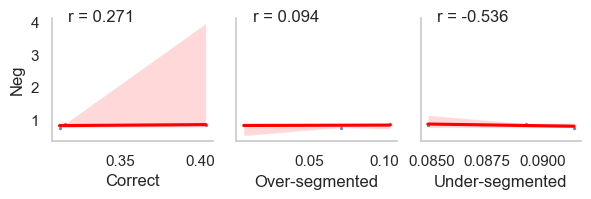

In [303]:
def corrfunc(x, y, hue=None, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    try:
        # print(method)
        # method = stats.PermutationMethod(n_resamples=np.inf, random_state=rng)
        # method = stats.MonteCarloMethod(rvs=(rng.uniform, rng.uniform))

        r, p = pearsonr(x, y)
        print(r,p)
    except:
        r = -1
        p = 0.0
    # print(r,p)
    # res = bootstrap((x,y), pearson_func , vectorized = False, paired = True)
    # print(res.confidence_interval)
    # print(res)
    # method = stats.BootstrapMethod(method='BCa', random_state=rng)
    # print(pearsonr(x, y).confidence_interval(confidence_level=0.9, method=method))
    if p <= 0.05:
        add_asterisk = '*'
    else:
        add_asterisk = ''
    ax = ax or plt.gca()
    ax.annotate(f'r = {r:.3f}{add_asterisk}', xy=(0.1, 0.97), xycoords=ax.transAxes)

sns.set(font_scale=1)
sns.set_style("whitegrid", {'axes.grid': False})

g = sns.pairplot(
    df_all, 
    # diag_kind="kde",
    y_vars = acc_metrics,
    x_vars = negmorph_metrics,
    kind="reg", 
    plot_kws={
        'line_kws':{'color':'red'},
        'scatter_kws': {'s': 2}
    },
    # corner = True,
    height = 2
    # hue = 'category'
    
)
g.map(corrfunc)

acc_metrics_label = ['Neg']
negmorph_metrics_label = ['Correct', 'Over-segmented', 'Under-segmented']

for i in range(len(negmorph_metrics)):
    for j in range(len(acc_metrics)):
        g.axes[j,i].xaxis.set_label_text(negmorph_metrics_label[i])
        g.axes[j,i].yaxis.set_label_text(acc_metrics_label[j])

# g.set( ylabel = 'Accuracy')

g.tight_layout()
# g.axes[0,0].set_xlim((0.0,0.8))
# g.axes[0,1].set_xlim((-0.1,1.0))
# g.axes[0,2].set_xlim((-0.1,1.0))
# g.axes[0,3].set_xlim((-0.1,1.0))
# g.axes[0,4].set_xlim((-0.1,1.0))

plt.show()